# Problem set 3
    
Hunter

PS 3

3/4/24

In [50]:
set more off 
insheet using loanrepay2013_highestresearch.csv, comma clear

(19 vars, 33 obs)


In [51]:
ds

opeid         instnm        all_under     sgrnt_low_~c  xstring
acceptrate    stabbr        netprice4l~e  igrnt_low_~c  ystring
y_lo_inc_rpy  hgroup        spend_ugd_~w  sandigrnt_~c  markerlabel
lo_inc_deb~n  upgrntn       x_aid_byst~r  instatetui~n


In [52]:
des


Contains data
 Observations:            33                  
    Variables:            19                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
opeid           long    %12.0g                
acceptrate      float   %9.0g                 
y_lo_inc_rpy    float   %9.0g                 Y_lo_inc_rpy
lo_inc_debt_mdn float   %9.0g                 
instnm          str43   %43s                  
stabbr          str2    %9s                   
hgroup          byte    %8.0g                 
upgrntn         long    %12.0g                
all_under       long    %12.0g                
netprice4lowi~e float   %9.0g                 
spend_ugd_4yr~w float   %9.0g                 
x_aid_bysticker float   %9.0g                 X_aid_bysticker
sgrnt_low_inc   float   %9.0g         

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)


    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.

    C. State your explanation why (theory) you make the predictions in A. and B.

    D. Tell us the source of your data and describe its sample.
    
    
    I am using data from Dr. Eaton's loan repayment sample. This data has 19 variables aboout colleges and college loan repayment among groups of students. 
    I hypothesize a relationship in that as my DV - Acceptance rate (percent) decreases, my IV - in state tuition (measured in dollars) will increase to until a certian point when tuition becomes too expensive. 
    - My theory is that schools that have lower acceptance rates are more prestegious and will cost more money to go to. There are less indivduals with lots of money, so the higher costing schools will have low acceptance rates

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [55]:
sum acceptrate instatetuition


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
  acceptrate |         33    .5843943    .1889504    .214635    .917538
instatetui~n |         33    10526.81    2454.705   5647.773   16535.96


In [56]:
xtile istuition = instatetuition, nq(5) 

In [57]:
sum instatetuition, detail
tab istuition


                       instatetuition
-------------------------------------------------------------
      Percentiles      Smallest
 1%     5647.773       5647.773
 5%     7188.533       7188.533
10%     7657.991       7657.991       Obs                  33
25%     8985.727       7657.991       Sum of wgt.          33

50%      9905.68                      Mean           10526.81
                        Largest       Std. dev.      2454.705
75%     12355.84       13324.26
90%     13324.26       13420.76       Variance        6025576
95%     15008.38       15008.38       Skewness       .3526854
99%     16535.96       16535.96       Kurtosis       2.642557

5 quantiles |
         of |
instatetuit |
        ion |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          7       21.21       21.21
          2 |          8       24.24       45.45
          3 |          5       15.15       60.61
          4 |          7       21.21       81.82

In [58]:
%head acceptrate instatetuition istuition

,acceptrate,instatetuition,istuition
1,.7800129,9157.466,2
2,.214635,12355.84,4
3,.5257108,12355.84,4
4,.4872242,12355.84,4
5,.228407,12355.84,4


In [60]:
sum instatetuition if istuition== 3


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
instatetui~n |          5       10064    234.6112    9905.68   10458.48


(bin=5, start=5647.7734, width=883.24531)
(bin=5, start=0, width=1294.391)


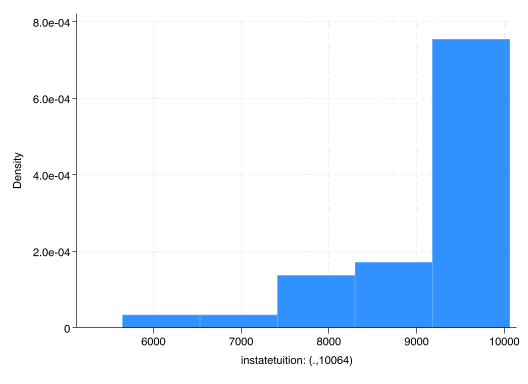

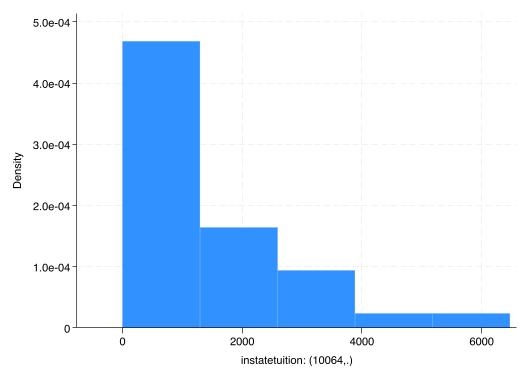

In [61]:
mkspline ist1 10064 ist2 = instatetuition

histogram ist1, name(hist1)
histogram ist2, name(hist2)


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      1.60
       Model |  .109972916         2  .054986458   Prob > F        =    0.2191
    Residual |  1.03249881        30  .034416627   R-squared       =    0.0963
-------------+----------------------------------   Adj R-squared   =    0.0360
       Total |  1.14247173        32  .035702242   Root MSE        =    .18552

------------------------------------------------------------------------------
  acceptrate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        ist1 |    .000023   .0000349     0.66   0.515    -.0000483    .0000943
        ist2 |  -.0000394   .0000223    -1.76   0.088     -.000085    6.19e-06
       _cons |    .418524    .313522     1.33   0.192    -.2217733    1.058821
--------------------------------------------------

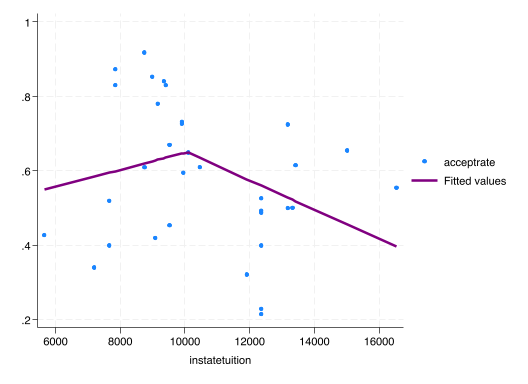

In [62]:
reg acceptrate ist1 ist2 
predict yhat 

tw (scatter acceptrate instatetuition) (line yhat instatetuition, sort color(purple) lwidth(thick))

In [ ]:
*Above ^ is figure 1

In [63]:
mkspline ist3 = instatetuition, cubic displayknots


             |     knot1      knot2      knot3      knot4      knot5 
-------------+-------------------------------------------------------
instatetui~n |  7847.062   9018.761    9905.68   12355.84    13177.2 


In [65]:
reg acceptrate ist3*


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(4, 28)        =      4.55
       Model |  .449908289         4  .112477072   Prob > F        =    0.0059
    Residual |   .69256344        28  .024734409   R-squared       =    0.3938
-------------+----------------------------------   Adj R-squared   =    0.3072
       Total |  1.14247173        32  .035702242   Root MSE        =    .15727

------------------------------------------------------------------------------
  acceptrate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       ist31 |   .0001334   .0000555     2.40   0.023     .0000196    .0002471
       ist32 |  -.0010358    .000672    -1.54   0.134    -.0024124    .0003408
       ist33 |   .0023746   .0022885     1.04   0.308    -.0023132    .0070625
       ist34 |  -.0010901   .0020389    -0.53   0.

In [67]:
predict yhat2

(option xb assumed; fitted values)


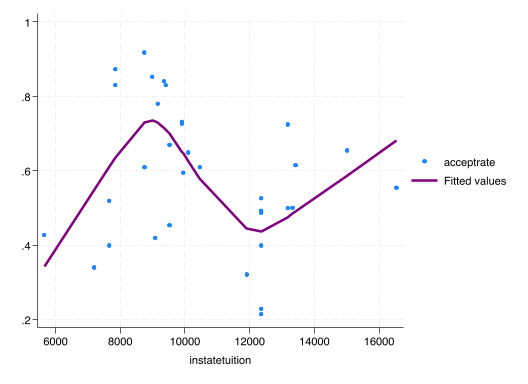

In [68]:
tw (scatter acceptrate instatetuition) (line yhat2 instatetuition, sort color(purple) lwidth(thick))

Gonna do the quadratic model using the variables X_aid_bysticker & acceptrate 
DV - acceptrate 
IV - X_aid_bysticker, "Need-based state aid per Pell recipient as % of sticker"
I hypothesize that acceptance rate will have a linear positive relationship with Need-based state aid per Pell recipient as % of sticker

I also think that schools that have higher acceptance rates must also have more need based state aid. This is because schools will be likely to accept students who thye have the funds and resources to support via state aid.  

In [69]:
gen istquad = instatetuition^2 

In [71]:
reg acceptrate instatetuition istquad


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      0.88
       Model |   .06354302         2   .03177151   Prob > F        =    0.4238
    Residual |  1.07892871        30   .03596429   R-squared       =    0.0556
-------------+----------------------------------   Adj R-squared   =   -0.0073
       Total |  1.14247173        32  .035702242   Root MSE        =    .18964

------------------------------------------------------------------------------
  acceptrate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
instatetui~n |   .0000267   .0001014     0.26   0.794    -.0001803    .0002338
     istquad |  -2.00e-09   4.59e-09    -0.44   0.665    -1.14e-08    7.36e-09
       _cons |   .5366563   .5429145     0.99   0.331     -.572123    1.645436
--------------------------------------------------

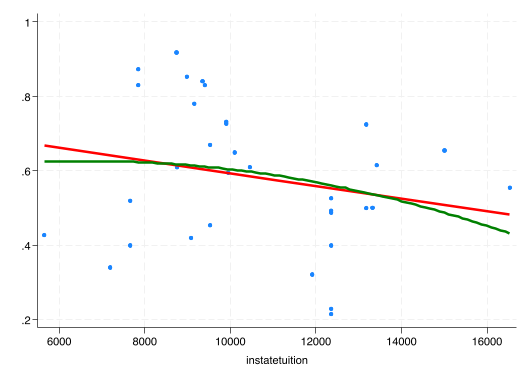

In [73]:
tw (scatter acceptrate instatetuition, sort) ///
(lfit acceptrate instatetuition, color(red) lwidth(thick)) ///
(qfit acceptrate instatetuition, color(green) lwidth(thick)), ///
legend(off) name(quadratic, replace)

In [79]:
gen loggedrepay=log10(acceptrate)

variable loggedrepay already defined
r(110);


In [80]:
reg loggedrepay instatetuition


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      1.18
       Model |  .029718169         1  .029718169   Prob > F        =    0.2854
    Residual |  .779766666        31  .025153763   R-squared       =    0.0367
-------------+----------------------------------   Adj R-squared   =    0.0056
       Total |  .809484835        32  .025296401   Root MSE        =     .1586

------------------------------------------------------------------------------
 loggedrepay | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
instatetui~n |  -.0000124   .0000114    -1.09   0.285    -.0000357    .0000109
       _cons |  -.1282157   .1233622    -1.04   0.307    -.3798145    .1233831
------------------------------------------------------------------------------


In [81]:
predict yhat3
replace yhat3=10^(yhat3) 

quietly reg acceptrate instatetuition 
predict yhat4, xb

(option xb assumed; fitted values)
(33 real changes made)


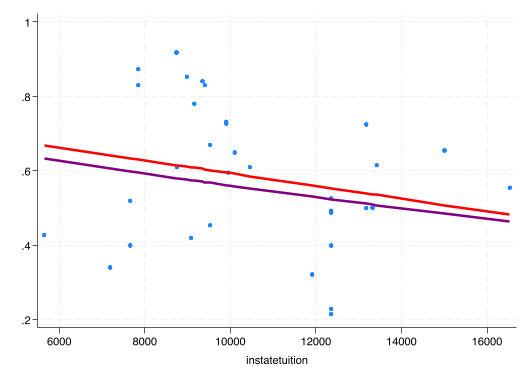

In [82]:
tw (scatter acceptrate instatetuition) ///
(line yhat4 instatetuition, sort color(red) lwidth(thick)) /// 
(line yhat3 instatetuition, sort color(purple) lwidth(thick)), legend(off)

In [86]:
sum instatetuition, detail 


                       instatetuition
-------------------------------------------------------------
      Percentiles      Smallest
 1%     5647.773       5647.773
 5%     7188.533       7188.533
10%     7657.991       7657.991       Obs                  33
25%     8985.727       7657.991       Sum of wgt.          33

50%      9905.68                      Mean           10526.81
                        Largest       Std. dev.      2454.705
75%     12355.84       13324.26
90%     13324.26       13420.76       Variance        6025576
95%     15008.38       15008.38       Skewness       .3526854
99%     16535.96       16535.96       Kurtosis       2.642557


In [89]:
egen ist_wtf = cut(instatetuition), at(4000,6000,8000,10000,12000,14000,16000)

(1 missing value generated)


In [90]:
tab ist_wtf


    ist_wtf |      Freq.     Percent        Cum.
------------+-----------------------------------
       4000 |          1        3.12        3.12
       6000 |          5       15.62       18.75
       8000 |         12       37.50       56.25
      10000 |          3        9.38       65.62
      12000 |         10       31.25       96.88
      14000 |          1        3.12      100.00
------------+-----------------------------------
      Total |         32      100.00


In [91]:
reg acceptrate i.ist_wtf


      Source |       SS           df       MS      Number of obs   =        32
-------------+----------------------------------   F(5, 26)        =      2.21
       Model |  .339999677         5  .067999935   Prob > F        =    0.0843
    Residual |  .801541992        26  .030828538   R-squared       =    0.2978
-------------+----------------------------------   Adj R-squared   =    0.1628
       Total |  1.14154167        31  .036823925   Root MSE        =    .17558

------------------------------------------------------------------------------
  acceptrate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     ist_wtf |
       6000  |   .1651803   .1923389     0.86   0.398    -.2301779    .5605386
       8000  |   .2749835   .1827501     1.50   0.144    -.1006646    .6506316
      10000  |    .099361    .202743     0.49   0.628    -.3173831    .5161052
      12000  |    .041631   .184150


Variables that uniquely identify margins: ist_wtf


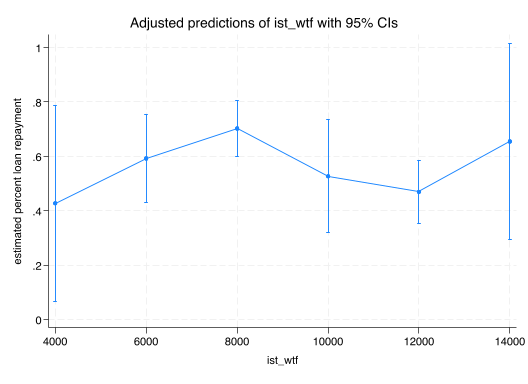

In [92]:
qui margins i.ist_wtf, atmeans
marginsplot, ytitle(estimated percent loan repayment)

In [ ]:
*BREAK


DV - acceptrate college acceptance rate
IV - X_aid_bysticker, "Need-based state aid per Pell recipient as % of sticker"
I hypothesize that acceptance rate will have a non-linear maybe spurrious relationship with Need-based state aid per Pell recipient as % of sticker. I theorize that state aid should not have a linerar or menaiful relationship with acceptance rate becausue schools are supposed to not discriminate based on finanial standing or need for aid. 

In [93]:
sum acceptrate x_aid_bysticker


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
  acceptrate |         33    .5843943    .1889504    .214635    .917538
x_aid_byst~r |         33    27.42915    20.02007      .0455    59.5033


In [94]:
xtile xaids = x_aid_bysticker, nq(5) 

In [95]:
sum x_aid_bysticker, detail
tab xaids


                       X_aid_bysticker
-------------------------------------------------------------
      Percentiles      Smallest
 1%        .0455          .0455
 5%       1.7579         1.7579
10%       3.2277         1.7579       Obs                  33
25%       8.3263         3.2277       Sum of wgt.          33

50%      27.0714                      Mean           27.42915
                        Largest       Std. dev.      20.02007
75%      43.5452        54.2455
90%      54.2455        54.2455       Variance       400.8031
95%      54.2455        54.2455       Skewness       .1371083
99%      59.5033        59.5033       Kurtosis       1.557661

5 quantiles |
         of |
x_aid_bysti |
       cker |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          7       21.21       21.21
          2 |          7       21.21       42.42
          3 |          6       18.18       60.61
          4 |         12       36.36       96.9

In [96]:
%head acceptrate x_aid_bysticker xaids

,acceptrate,x_aid_bysticker,xaids
1,.7800129,5.5465,1
2,.214635,54.2455,4
3,.5257108,54.2455,4
4,.4872242,54.2455,4
5,.228407,54.2455,4


In [97]:
sum x_aid_bysticker if xaids== 3


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
x_aid_byst~r |          6     27.4318    3.113153    22.9292    30.5019


(bin=5, start=.0455, width=5.4772602)
(bin=5, start=0, width=6.4142998)


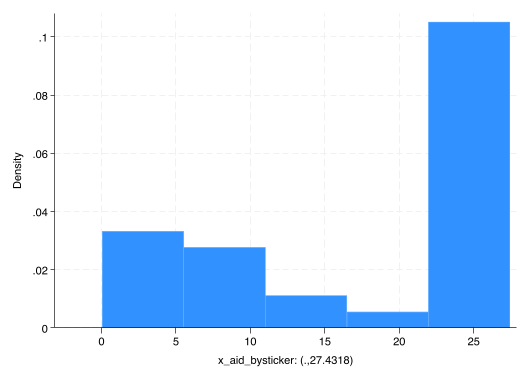

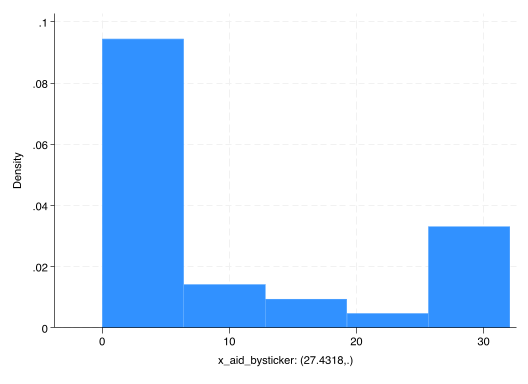

In [111]:
mkspline xaidlin1 27.4318 xaidlin2 = x_aid_bysticker

histogram xaidlin1, name(histaid)
histogram xaidlin2, name(histaid2)


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =     10.86
       Model |  .479751027         2  .239875513   Prob > F        =    0.0003
    Residual |  .662720702        30   .02209069   R-squared       =    0.4199
-------------+----------------------------------   Adj R-squared   =    0.3813
       Total |  1.14247173        32  .035702242   Root MSE        =    .14863

------------------------------------------------------------------------------
  acceptrate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    xaidlin1 |  -.0047557   .0032876    -1.45   0.158    -.0114698    .0019584
    xaidlin2 |  -.0072915   .0030211    -2.41   0.022    -.0134615   -.0011216
       _cons |   .7370244   .0549692    13.41   0.000     .6247624    .8492864
--------------------------------------------------

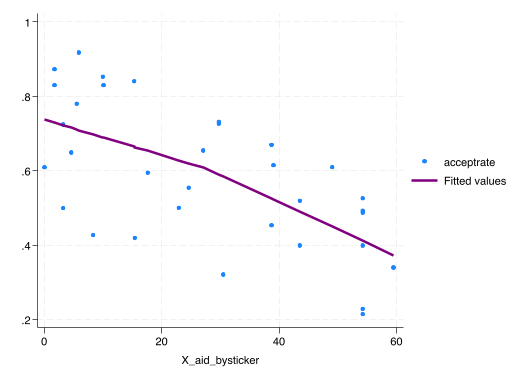

In [113]:
reg acceptrate xaidlin1 xaidlin2 
predict yhatscat

tw (scatter acceptrate x_aid_bysticker) (line yhatscat x_aid_bysticker, sort color(purple) lwidth(thick))

In [114]:
mkspline xaids3 = x_aid_bysticker, cubic displayknots


             |     knot1      knot2      knot3      knot4      knot5 
-------------+-------------------------------------------------------
x_aid_byst~r |    3.2277    8.91087    27.0714    43.5452    54.2455 


In [115]:
reg acceptrate xaids3*


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(4, 28)        =      5.36
       Model |  .495259065         4  .123814766   Prob > F        =    0.0025
    Residual |  .647212664        28  .023114738   R-squared       =    0.4335
-------------+----------------------------------   Adj R-squared   =    0.3526
       Total |  1.14247173        32  .035702242   Root MSE        =    .15204

------------------------------------------------------------------------------
  acceptrate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     xaids31 |  -.0018896   .0134606    -0.14   0.889    -.0294624    .0256831
     xaids32 |  -.0713989   .1834642    -0.39   0.700    -.4472082    .3044104
     xaids33 |    .117631   .2780636     0.42   0.676    -.4519564    .6872184
     xaids34 |  -.1100835   .1793317    -0.61   0.

In [116]:
predict yhatcube

(option xb assumed; fitted values)


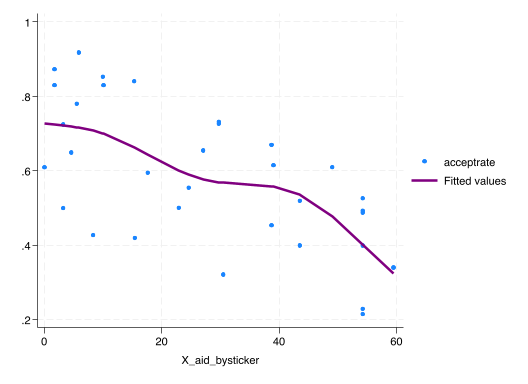

In [121]:
tw (scatter acceptrate x_aid_bysticker) (line yhatcube x_aid_bysticker, sort color(purple) lwidth(thick))

In [ ]:
**Figure 2

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

After trying all of the different graphs on my first hypothesis reguarding acceptance rate and in state tuition I found one non-linear relationship. The spline graph in figure 1 indicates a drop in acceptance rate after instate tuition reaches around $10,000, acceptance rates begin to decline. This relationship is consistent with the theory and literature of college as a capitalist system, where college systems accept students who are the most likely to be able to pay their tuition bills. As tuition gets higher, a smaller demographic of individuals are able to reliably pay the tuition. This results in schools with higher tuition (after ~$10,000) to have lower acceptance rates.

This relationship can also be viewed in the cubic spline below figure 1. THe cubic spline has a significantly higher rsquared value than the linear spline. This is likely because the cubic spline is able to account for the resurgence in acceptance rate after tuition passes $13,000. I think that this is being represented because their are not enough data entries for schools that charge over $12,000 for tuition. THis skews my graph to make the few schools with high tuition more heavily weighted in changing the distribution 
The results for these two variables are consistent with my hypothesis

Upon analysis of the cubic spline graph for my second hypothesis I am finding a relationship between acceptance rate and Needbased state aid per Pell recipient as % of sticker. The rsquared coefficent for the cubic districution is a whopping 43%. This means that 43 percent of my change in x can be explained by my change in y. In figure 2, my hypothesis is proven wrong. Acceptance rate is high for a 0 percent sticker in state aid; as the percentage of state aid grows, the acceptance rate of schools declines until the distriubution flattenens out around the 50 percent acceptance rate over a span of about 28-40 percent of state aid per pell recipient. This flatenning is probably the baseline or "normal" ratio in this population. That means that most schools probably offer college price stickers ranging anywhere from 28-40 percent of state aid coming from pell grants. These schools/ the majority of schools also probably have around a %50 acceptance rate if they offer this sticker ammount. This relationship changes to represent the trend that colleges who offer sticker with high (over 40) percentages for state aid tend to also have lower percentages for acceptance rate of students. 